In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [57]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

In [46]:
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [55]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [48]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [49]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2574 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1030 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0682 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0366 - accuracy: 0.9892


In [51]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9785


In [52]:
print("test_acc : ", test_acc)

test_acc :  0.9785000085830688


In [31]:
import matplotlib.pyplot as plt

In [42]:
digit = train_images[4]

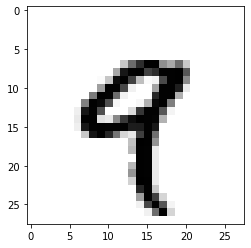

In [43]:
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [58]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [20]:
import numpy as np

In [10]:
np.array([1,2,3]).shape

(3,)

In [12]:
np.array([
    [1,2,3],
    [4,5,6]]).shape

(2, 3)

In [1]:
from keras.datasets import imdb

In [32]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words = 10000)

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

In [16]:
decoded_review = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [27]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [42]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [36]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [39]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [44]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [49]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.7232 - val_accuracy: 0.8670
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.7733 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.7938 - val_accuracy: 0.8642
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.8180 - val_accuracy: 0.8636
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.8508 - val_accuracy: 0.8649
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 6.5409e-04 - accuracy: 1.0000 - val_loss: 0.8746 - val_accuracy: 0.8650
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.9067 - val_accuracy: 0.8625
Epoch 8/2

In [50]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 1.4414 - accuracy: 0.8425


In [51]:
results

[1.4414161443710327, 0.842519998550415]

In [52]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))

model.add(layers.Dense(1, activation = 'sigmoid'))

In [54]:
model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['accuracy'])

In [55]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 28ms/step - loss: 0.1676 - accuracy: 0.7956 - val_loss: 0.1263 - val_accuracy: 0.8606
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0967 - accuracy: 0.9029 - val_loss: 0.0986 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0729 - accuracy: 0.9277 - val_loss: 0.0940 - val_accuracy: 0.8795
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0585 - accuracy: 0.9413 - val_loss: 0.0851 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0488 - accuracy: 0.9526 - val_loss: 0.0836 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0415 - accuracy: 0.9622 - val_loss: 0.0828 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0358 - accuracy: 0.9672 - val_loss: 0.0841 - val_accuracy: 0.8844
Epoch 8/20
30

In [56]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.1117 - accuracy: 0.8558


In [57]:
results

[0.11170575022697449, 0.8557599782943726]

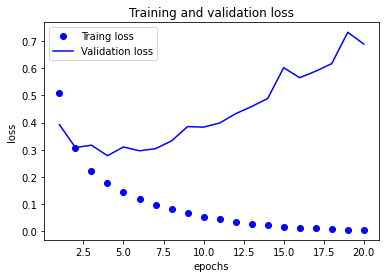

In [48]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Traing loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

In [58]:
from keras.datasets import reuters

In [59]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(
num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [64]:
print(len(train_data))
print(len(test_data))

8982
2246


In [67]:
print(train_labels[10])
print(train_labels[5])

3
4


In [72]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
y_train = vectorize_sequences(test_data)

In [74]:
from keras.utils.np_utils import to_categorical #벡터 변환 내장함수

In [76]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [99]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy']) #이 문제의 경우 출력층은 46개가 되야함. 그리고 중간층은 46개 보다 많아야함, 그렇지 않으면 정확도 감소

In [83]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [84]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 45ms/step - loss: 2.7144 - accuracy: 0.5388 - val_loss: 1.7828 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 28ms/step - loss: 1.4657 - accuracy: 0.6986 - val_loss: 1.3391 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 1.0740 - accuracy: 0.7751 - val_loss: 1.1377 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.8400 - accuracy: 0.8216 - val_loss: 1.0283 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 0.6654 - accuracy: 0.8606 - val_loss: 0.9559 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5278 - accuracy: 0.8926 - val_loss: 0.9074 - val_accuracy: 0.8250
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.4222 - accuracy: 0.9148 - val_loss: 0.8871 - val_accuracy: 0.8120
Epoch 8/20
16

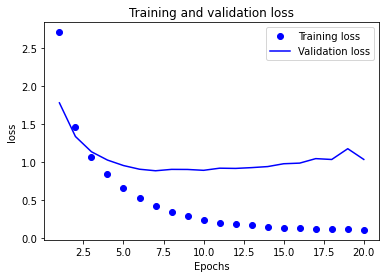

In [85]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

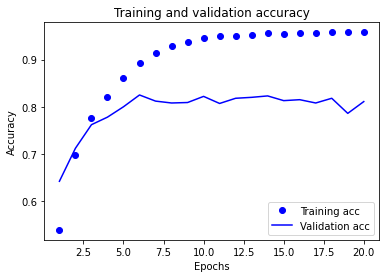

In [89]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()

plt.show() # 9번째 이후로 과대적합 문제 발생

In [91]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [93]:
np.sum(predictions[0])

0.99999994

In [94]:
np.argmax(predictions[0])

4

In [96]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [98]:
y_train = np.array(train_labels)
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [100]:
from keras.datasets import boston_housing

In [105]:
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

In [108]:
train_data.shape #각각의 13개의 feature 는 다른 스케일을 가지고 있음 >> 학습을 어렵게함 > 특성별로 정규화 필요

(404, 13)

In [104]:
test_data.shape

(102, 13)

In [106]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [114]:
mean = train_data.mean(axis = 0)
mean.shape #데이터 정규화 과정

(13,)

In [116]:
train_data -= mean

In [117]:
std = train_data.std(axis = 0)
train_data /= std

In [118]:
test_data -= mean

In [119]:
test_data /= std

In [123]:
train_data.shape[1]

13

In [173]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# k-fold 검증 

**데이터가 적은데 훈련과 검증셋으로 나누면 정확도가 많이 떨어짐. >> k-fold 사용**

**데이터를 k-1개로 분할해서 훈련하고 나머지로는 평가, 점수는 평균**

**데이터가 충분하다면 홀드아웃 검증 이용**

In [131]:
len(train_data)

404

In [162]:
num_val_samples = len(train_data) // k
all_mae_histories = []
k = 4

In [175]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [178]:
all_scores # 검증세트가 다르므로 검증 점수가 2.1 에서 2.9까지 변화가 큼

[1.9745084047317505, 2.3127756118774414, 2.749037265777588, 2.585538148880005]

In [177]:
np.mean(all_scores) # 평균적으로 2400달러 차이가 난다.

2.405464857816696

In [180]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                       validation_data = (val_data, val_targets),
                       epochs = num_epochs, batch_size = 1, verbose = 0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0


KeyError: 'val_mean_absolute_error'

In [183]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [184]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0


KeyError: 'val_mean_absolute_error'

In [186]:
import keras

In [188]:
import sklearn

In [189]:
sklearn.__version__

'0.24.1'

**최적화**

**가능한 훈련 데이터에서 최고의 성능 얻으려고 모델을 조정하는 과정**

**과대적합 피하기 위한 방법**

**regulization 이용**

**L1 , L2규제**

In [2]:
from keras import regularizers

In [3]:
regularizers.l1(0.01)  #l1 규제
regularizers.l1_l2(l1 = 0.001, l2 = 0.001) # l1, l2규제 병행

**과대적합 피하기 위한 방법2**

**드롭 아웃 이용**

**층의 출력 값에 노이즈를 추가하여 네트워크가 패턴을 기억하는 것을 막는다**

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

**과대적합 피하는 방법**

**훈련데이터 더 모으기, 네트워크 용량감소, 가중치 규제, 드롭아웃 추가**

**문제 정의**

**입력 데이터는 어떤 것인지, 문제가 어떤 종류인지 (이진분류,다중분류, 스칼라회귀, 벡터회귀, 군집, 강화학습**

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [30]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) # 이미지가 rge이미지라면 3 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 30s 31ms/step - loss: 0.1759 - accuracy: 0.9446
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0480 - accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0328 - accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0253 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0193 - accuracy: 0.9942


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0261 - accuracy: 0.9924


In [32]:
test_acc

0.9923999905586243

# 완전 연결한 모델보다 컨브넷이 더 정확도 높은 이유

**Dense 층은 전역패턴을 학습하지만 합성곱 층은 지역 패턴을 학습**

**컨브넷은 패턴의 공간적 계층 구조를 학습**

**Conv2D(output_depth , (window_height, window_width))**

**최대 풀링으로 다운샘플링 하는 이유 : 과대적합 줄이기 위해, 처리할 특성 맵의 가중치 개수 줄이기 위헤**

In [73]:
import os, shutil

In [82]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './datasets/cats_and_dogs_small\\train'

In [ ]:
#

In [76]:
from keras.preprocessing.image import ImageDataGenerator

In [77]:
# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './cats_and_dogs_small\\train'

# 이미지 증식

In [ ]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# VGG16 모델

In [10]:
from keras.applications.vgg16 import VGG16

In [11]:
conv_base = VGG16(weights='imagenet', # 초기화할 가중치 체크포인트
                  include_top=False, # 네트워크의 최상위 완전 연결 분류기 포함할지
                  input_shape=(150, 150, 3)) 

58900480/58889256 [==============================] - 4s 0us/step


In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'